In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    

In [4]:
import community
import pandas as pd
import re
import warnings
import nltk
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer 
from nltk.stem import WordNetLemmatizer
import json
import community as community_louvain
import community as generate_dendrogram
import numpy as np
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
from nltk.probability import FreqDist
import math
from nltk.tokenize import sent_tokenize
from nltk.corpus import PlaintextCorpusReader
from fa2 import ForceAtlas2
from pyvis import network as net
from pyvis.network import Network
from IPython.core.display import display, HTML

In [5]:
file_to_read = open("marvel_movies_raw_text.pickle", "rb")
movies_raw_text = pickle.load(file_to_read)
file_to_read.close()

file_to_read = open("marvel_characters_raw_text.pickle", "rb")
characters_raw_text = pickle.load(file_to_read)
file_to_read.close()

file_to_read_characters = open("df_characters.pickle", "rb")
df_characters = pickle.load(file_to_read_characters)
file_to_read_characters.close()

file_to_read_movies = open("df_movies.pickle", "rb")
df_movies = pickle.load(file_to_read_movies)
file_to_read_movies.close()

file_to_read_movies = open("df_tv.pickle", "rb")
df_tv = pickle.load(file_to_read_movies)
file_to_read_movies.close()


file_to_read_movies = open("graph_G.pickle", "rb")
G = pickle.load(file_to_read_movies)
file_to_read_movies.close()

file_to_read_movies = open("links.pickle", "rb")
links = pickle.load(file_to_read_movies)
file_to_read_movies.close()

file_to_read_movies = open("attributes.pickle", "rb")
attributes = pickle.load(file_to_read_movies)
file_to_read_movies.close()

file_to_read_movies = open("attributes_org_character.pickle", "rb")
attributes_org = pickle.load(file_to_read_movies)
file_to_read_movies.close()

file_to_read_movies = open("attributes_character_all.pickle", "rb")
attributes_teams = pickle.load(file_to_read_movies)
file_to_read_movies.close()

#### Add phase color to movie df

In [6]:
def f(row):
    '''
    Function that defines color dependent on movie phase
    '''
    node_size =100
    if row['Phase']== 'Phase_One_Movies':
        edge_col ='magenta'
    elif row['Phase']== 'Phase_Two_Movies':
        edge_col ='lightpink'
    elif row['Phase']== 'Phase_Three_Movies':
        edge_col ='orange'
    else:
        edge_col ='purple'
    return edge_col

In [7]:
df_movies['color'] =  df_movies.apply(f, axis=1)
df_movies['size']  = 30
df_movies['title']  = df_movies['movies']

#### Exrtract relevant info from teams and organasation

In [8]:
# Extract only relevant values from teams and organsation
attr_org_teams = {}
for keys, values in attributes_org.items():
    attr_org_teams[keys]={'Organisation(s)':values['Organisation(s)'], 
                          'Team(s)':attributes_teams[keys]['Team(s)']}

In [9]:
teams = []
for keys, values in attr_org_teams.items():
    for t in values['Team(s)']:
        teams.append(t)
teams_unique = np.unique(teams)


In [10]:
#colors = list(np.random.choice(range(256), size=len(teams_unique)))

from random import randint

colors = []
n = len(teams_unique)

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [11]:
# creaate color for a team and add to character
teams_unique = np.unique(teams)
clr = {teams_unique[i]: colors[i] for i in range(len(np.unique(teams)))}
color_teams = {}
for key, values in attr_org_teams.items():
    if len(values['Team(s)'])>0:
        if len(values['Team(s)'])>1:
            color_teams[key] = {'color': clr[values['Team(s)'][0]]}
        else:
            color_teams[key] = {'color': clr[''.join(values['Team(s)'])]}
    else:
        color_teams[key] = {'color': 'grey'}

# Character graph
* The character graph is made using the characters as nodes and an edge exists if another character is mentioned on his characters page. The width of the edge indicates how many times the mentioned character is mentioned 
> * we assume that the more a character is mentioned the more connected are the two characters
> * The colors of the nodes are ?
> * The size of the nodes are either the size of the degree or the number of movies the character has been in. 

The visualisations are made on the undirected graph

In [12]:
# GCC
D_GCC = G.subgraph(max(nx.weakly_connected_components(G), key=len))
U_GCC = D_GCC.to_undirected()

## Add additional attributes to the character graph

In [13]:
# add degree as an attribute
degrees = dict(U_GCC.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(U_GCC,degrees,'size')

# Add organisation attributes to the graph
nx.set_node_attributes(U_GCC,attr_org_teams)

In [14]:
# Save movie_tv_graph
file_to_store = open("character_graph_color_status.pickle", "wb")
pickle.dump(U_GCC, file_to_store)
file_to_store.close()



## Graph visualisation of character graph
### Interaktiv graph - character graphs

> * Det kunne være nice at farvelægge efter teams


#### Grafer som kunne være nice
* Graphs with characters and their links - colored by teams - tjek
* Graphs with characters and their links - colored by status - tjek
* Graph with all caharacters and movies as nodes

* Graphs with characters and their links - colored by citizen? 

### Graphs to show development
* 

In [24]:
# Set attributes
titles = {}
att = {}
color = {}
for name, data in U_GCC.nodes(data = True):
    color[name] = {'color': 'skyblue'}
    title = 'name: '+ name +'</br>movies: ' + str(data['movies']) +\
    '</br>tv-serie: ' + str(data['tv-serie'])+\
    '</br>Teams: ' + str(data['Team(s)']) +\
    '</br>Organisation: ' + str(data['Organisation(s)']) + \
    ' </br>citizen: ' + str(data['citizen']) + \
    ' </br>specie: ' + str(data['specie']) + \
    ' </br>status: ' + str(data['status'])
    
    titles[name] = title
    node_size = 1+data['No_movies']
    att[name] = {'size': node_size}
nx.set_node_attributes(U_GCC, titles, 'title')
# nx.set_node_attributes(D_GCC, att) # Hvis number of movies skal være node size (men så overser vi dem i tv -serier)


In [25]:
def pyvis_graph(G, header, html_title, notebook = False, gravity=-50, central_gravity=0.01, spring_length=50, spring_strength=0.02, damping=1):
    character_graph = Network(height='750px', width='90%', 
                              #bgcolor='#222222',
                              heading=header, notebook = notebook)
    character_graph.from_nx(G)
    character_graph.force_atlas_2based(gravity=gravity, central_gravity=central_gravity, spring_length=spring_length, spring_strength=spring_strength, damping=damping, overlap=0)
    #character_graph.show_buttons(filter_=['physics'])
    return character_graph.show(html_title)
    
    

In [26]:
# Colored by status

pyvis_graph(U_GCC, 'Marvel Cinematic Universe Character Overview', 'character_graph_no_color.html')

In [408]:
# Colored by teams
nx.set_node_attributes(U_GCC,color_teams) # Changing node attribute

pyvis_graph(U_GCC, 'Marvel Cinematic Universe Character Overview, colored by status', 'character_graph_color_teams.html')

# Create graph with all characters and movies
Links are created if a character mentions a movies

In [616]:
movie_links_all = {}
for k,v in attributes.items():
    movie_links_all[k] = [va for va in v['movies']]
    
#Copy graph and create a graph with movies and characters as nodes
U_GCC_with_movies = U_GCC.copy()
U_GCC_with_movies.add_nodes_from(df_movies['movies'])

In [580]:
# add edge between movies and character
for k, m in movie_links_all.items():
    for i in m:
        U_GCC_with_movies.add_edge(k,i)

In [581]:
# add atributes for movies and size and color
attribute_size = {}
for node in U_GCC_with_movies.nodes():
    if (node in list(df_movies['movies'])):
        #set the node name as the key and the label as its value 
        attribute_size[node] = {'size': 20,'shape': 'diamond', 'color': ''.join(df_movies[df_movies['movies'] == node]['color'].values)}
    else:
        attribute_size[node] = {'size': 10, 'color': 'skyblue'}

nx.set_node_attributes(U_GCC_with_movies,attribute_size)

degrees = dict(U_GCC_with_movies.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(U_GCC_with_movies,degrees,'size')

In [582]:
# Create graph with all characters and movies as nodes!
pyvis_graph(U_GCC_with_movies, 'Marvel Cinematic Universe Character Overview with movies', 
            'character_graph_movies_only (skal ikke med).html', gravity=-30)




Graph show there is the movie part and then there are the tv serie part??

# Character graph with tv-series and movies (0)


In [724]:
# Create links so we can see what character connects the movies and tv-series
tv_movie_character_links = {}

for k,v in attributes.items():
    links = []
    for va in v['tv-serie']:
        links.append(va)
    for vaa in v['movies']:
        links.append(vaa)
    tv_movie_character_links[k] = links

#Copy graph and create a graph with movies and characters as nodes
U_GCC_with_movies_tv_series = U_GCC.copy()
U_GCC_with_movies_tv_series.add_nodes_from(df_movies['movies'])
U_GCC_with_movies_tv_series.add_nodes_from(df_tv['tv_series'])

In [725]:
# add edge between movies and character
for k, m in tv_movie_character_links.items():
    for i in m:
        U_GCC_with_movies_tv_series.add_edge(k,i)

In [726]:
# add atributes for movies and size and color
attribute_size = {}
for node in U_GCC_with_movies_tv_series.nodes():
    if (node in list(df_movies['movies'])):
        #set the node name as the key and the label as its value 
        attribute_size[node] = {'physics': False,'size': 20,'shape': 'diamond','title': node,'color': ''.join(df_movies[df_movies['movies'] == node]['color'].values)}
    elif (node in list(df_tv['tv_series'])):
        attribute_size[node] = {'physics': False,'size': 20, 'color': 'lightgreen','title': node, 'shape': 'diamond'}
    else: 
        attribute_size[node] = {'size': 20, 'color': 'skyblue'}

nx.set_node_attributes(U_GCC_with_movies_tv_series,attribute_size)
degrees = dict(U_GCC_with_movies_tv_series.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(U_GCC_with_movies_tv_series,degrees,'size')


In [727]:
# Create graph with all characters and movies as nodes!
pyvis_graph(U_GCC_with_movies_tv_series, 'Marvel Cinematic Universe Character Overview with Movies and TV-series', 
            'character_graph_movies_and_tv-series.html', gravity=-30, spring_length=100, 
            spring_strength=0.1, damping=1)




# Character graph with tv-series and movies (1)
* no links between characters - movies/tv-series are the connection

In [733]:
# Create links so we can see what character connects the movies and tv-series
tv_movie_character_links = {}

for k,v in attributes.items():
    links = []
    for va in v['tv-serie']:
        links.append(va)
    for vaa in v['movies']:
        links.append(vaa)
    tv_movie_character_links[k] = links


In [734]:
# Create graph
G_movies_tv_characters, GCC_movies_tv_characters = \
                    create_graph(tv_movie_character_links, attributes)
nx.set_node_attributes(G_movies_tv_characters,degrees,'size')
nx.set_node_attributes(G_movies_tv_characters,attr_org_teams)

Number of nodes in total graph: 3370
Number of edges in total graph: 3754
Number of nodes in GCC: 3062
Number of edges in GCC: 3736


In [735]:
# Add attributes to movies
attribute = {}
for show in G_movies_tv_characters.nodes():
    if show in list(tv_series_unique):
        attribute[show] = {'color': 'lightgreen','shape': 'diamond', 'title': show, 'physics': False}
    elif show in list(df_movies['movies']):
        attribute[show] = {'physics': False, 'shape': 'diamond', 'title': show, 'color': ''.join(df_movies[df_movies['movies'] == show]['color'].values)}
    else:
        attribute[show] = {'color':'skyblue'}
nx.set_node_attributes(G_movies_tv_characters, attribute)

In [736]:
# Set attributes to characters
titles = {}
for name, data in G_movies_tv_characters.nodes(data = True):
    if name in attributes.keys():
        title = 'name: '+ name +'</br>movies: ' + str(data['movies']) +\
        '</br>tv-serie: ' + str(data['tv-serie'])+\
        '</br>Teams: ' + str(data['Team(s)']) +\
        '</br>Organisation: ' + str(data['Organisation(s)']) + \
        ' </br>citizen: ' + str(data['citizen']) + \
        ' </br>specie: ' + str(data['specie']) + \
        ' </br>status: ' + str(data['status'])
    
        titles[name] = title
nx.set_node_attributes(G_movies_tv_characters, titles, 'title')
# nx.set_node_attributes(D_GCC, att) # Hvis number of movies skal være node size (men så overser vi dem i tv -serier)


In [737]:
# Create graph with all characters and movies as nodes!
pyvis_graph(G_movies_tv_characters, 'Marvel Cinematic Universe Character Overview with Movies and TV-series', 
            'all_character_graph_movies_and_tv-series(skal måske med).html', gravity=-30)



# Create graph with tv-series

In [ ]:
def get_common_characters(movie_character_dict):
    # find common characters in movies
    no_movies = len(movie_character_dict.keys())
    movie_common_character_dict = {}
    no_common_characters_movie = {}
    for keys_movies, values_char in movie_character_dict.items():
        movies_in_common = []
        count = 0
        for i in range(no_movies):
            try:
                next_key = list(movie_character_dict)[list(movie_character_dict).index(keys_movies) + (i+1)]
                for names in values_char: # loop over characters in movie
                    if names in movie_character_dict[next_key]:
                        movies_in_common.append(next_key)
            except (ValueError, IndexError):
                count += 1
        link_ = {i:movies_in_common.count(i) for i in movies_in_common}
        no_common_characters_movie[keys_movies] = {k:v for (k,v) in link_.items()}
        movie_common_character_dict[keys_movies] = set(movies_in_common)
    return no_common_characters_movie,movie_common_character_dict

In [418]:
tv_character_dict = {}
for tv in df_tv['tv_series']:
    in_tv = []
    [in_tv.append(character) for character, attribut in attributes.items() if tv in attribut['tv-serie']]
    tv_character_dict[tv] = in_tv

In [419]:
tv_series_unique = tv_character_dict.keys()

In [420]:
no_common_characters_tv, tv_common_character_dict = get_common_characters(tv_character_dict)

In [421]:
# Create graph
G_tv_common, GCC_tv_common = create_graph(tv_common_character_dict, {})
edge_att = get_edge_att(GCC_tv_common,no_common_characters_tv)
nx.set_edge_attributes(GCC_tv_common, edge_att)
#nx.set_node_attributes(GCC_tv_common, dict_movies_attributes)

# add degree as an attribute
degrees = dict(G_tv_common.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(G_tv_common,degrees,'size')


Number of nodes in total graph: 32
Number of edges in total graph: 166
Number of nodes in GCC: 24
Number of edges in GCC: 166


In [422]:
# Create graph with all characters and movies as nodes!
pyvis_graph(G_tv_common, 'Marvel Cinematic Universe Character Overview TV-series', 
            'tv-series_graph_common (skal ikke med).html',gravity = -30,damping=1, notebook = True)

# Create Movie graph

## Movie graphs
* Graph with links where the edges are if movies shares a character
>* width are how many shared characters
>* Nodes = movies
* Graph with selected main characrters, edges through the characters
>* Creates an overview of how the characters are connected through movies
* Others ?

### Movies graphs
* Graph with characters and movies (evt TV series)
* Graph with movies and phase color

In [425]:
def get_edge_att(G, links_no):
    '''
    Function that returns edge attributes
    '''
    edge_att ={}
    for u,v,_ in list(G.edges(data = True)):
        edge_att[(u,v)]={'value': links_no[u][v]}
    return edge_att

def create_graph(links, dict_movies_attributes):
    G = nx.DiGraph(links)
    print("Number of nodes in total graph: {}".format(G.number_of_nodes()))
    print("Number of edges in total graph: {}".format(G.number_of_edges()))
    G.remove_nodes_from(list(nx.isolates(G)))
    
    nx.set_node_attributes(G,dict_movies_attributes)
    
    # create giant connected component
    GCC = G.subgraph(max(nx.weakly_connected_components(G), key=len)) # the biggest component
    print("Number of nodes in GCC: {}".format(GCC.number_of_nodes()))
    print("Number of edges in GCC: {}".format(GCC.number_of_edges()))
    
    return G, GCC

In [426]:
# create dictionary with movie attributes
dict_movies_attributes = df_movies[
    ['movies', 'Phase', 'color', 'size','title']].set_index('movies').T.to_dict('dict')

## Movie graph colored in phases (edges with common characters)
* Nodes = movies
* Edges = common characters
* Edge with = number of common characters
* Node color = phases
* Edge color = ??
* Node size ??

### Konklusion - giver måske ikke så god mening??

**Create a dicitonary with movies as keys and characters in the movies as a list**

In [428]:
# Create a dicitonary with movies as keys and characters in the movies as a list
movie_character_dict = {}
for movie in df_movies['movies']:
    in_movie = []
    [in_movie.append(character) for character, attribut in attributes.items() if movie in attribut['movies']]
    movie_character_dict[movie] = in_movie


file_to_store = open("movie_character_dict.pickle", "wb")
pickle.dump(movie_character_dict, file_to_store)
file_to_store.close()


**Find common characters in each movie**
* Add movie to key if they have a common character
* Count how many common characters the movies have in common

In [429]:
no_common_characters_movie, movie_common_character_dict = get_common_characters(movie_character_dict)

In [430]:
# Create graph
G_movie_common, GCC_movie_common = create_graph(movie_common_character_dict, {})
edge_att = get_edge_att(GCC_movie_common,no_common_characters_movie)
nx.set_edge_attributes(GCC_movie_common, edge_att)
nx.set_node_attributes(GCC_movie_common, dict_movies_attributes)



Number of nodes in total graph: 35
Number of edges in total graph: 304
Number of nodes in GCC: 32
Number of edges in GCC: 304


In [431]:
node_movie_size = {}
for movie in df_movies['movies']:
    node_movie_size[movie] = {'size': 10}
nx.set_node_attributes(G_movie_common, node_movie_size)

In [433]:
# Create graph with all characters and movies as nodes!
pyvis_graph(G_movie_common, 'Marvel Cinematic Universe Movie Overview', 
            'movie_graph_common (skal ikke med).html',gravity = -30,damping=1, notebook = True)

# Create graph with movies and tv-series

In [434]:
movie_tv_character_dict = {**movie_character_dict , **tv_character_dict}

In [435]:
no_common_characters_movie_tv,movie_tv_common_character_dict = get_common_characters(movie_tv_character_dict)

In [436]:
# Create graph
G_movie_tv_common, GCC_movie_tv_common = create_graph(movie_tv_common_character_dict, {})
edge_att = get_edge_att(G_movie_tv_common, no_common_characters_movie_tv)
nx.set_edge_attributes(G_movie_tv_common, edge_att)
nx.set_node_attributes(G_movie_tv_common, dict_movies_attributes)

# add degree as an attribute
degrees = dict(G_movie_tv_common.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(G_movie_tv_common,degrees,'size')

Number of nodes in total graph: 67
Number of edges in total graph: 934
Number of nodes in GCC: 57
Number of edges in GCC: 933


In [437]:
# Create graph with all characters and movies as nodes!
pyvis_graph(G_movie_tv_common, 'Marvel Cinematic Universe Movie and tv-series Overview', 
            'movie_tv_graph_common (skal ikke med).html',gravity = -30,damping=1, notebook = True)

# Movie graph plot
* Nodes = movies and main characters
* edges = if they share a main character
* Node color = phase color
* Node size = set manually - movies largest, then main characters 
* edge with ??

**Using dict_movies_attributes**

### Create movie graph (Edges between main characters)
> Objective: Explore the marvel movie world - see how movies are connected through main characters

* The movie graph is created using the movie dictionary with the 35 movies and then the main characters as nodes. 
* The edges are determined on what movies the main characters have in common, eg. Iron Man appears in both Iron Man 1 and Avengers, thus Iron Man 1 and Avengers are connected through the character Iron Man.

In [738]:
# Extract main characters from the movies and create a d dict with the movies 
# they have appeared in based on the attributes from the graph. 
main_characters = ('Iron Man', 'Spider-Man', 'Thor','Black Widow',
                   'Captain America', 'Captain Marvel','Doctor Strange', 'Hulk', 'Shang-Chi',
                   'Star-Lord','Hawkeye', 'Black Panther', 'Steve Rogers','Thena')
# main_character_dict = {k: attributes.get(k, None) for k in main_characters}

# 'Nick Fury'
one_movie_character = ('Michelle Jones','Thanos','Happy Hogan', 'Martinex', 'Audrey Nathan', 'Dane Whitman', 'Church Keeper', 'Isabela Alvarez', 'Uzman', 'Alexei (Pig)', 'Executioner', 'Hutter', 'Knox', 'Meade', 'Norex', 'Thena', 'Kamar-Taj Librarian', 'Nathan Garrett', 'Emily (Housekeeper)', 'Ernesto (Cousin)', 'Gilgamesh', 'Werner von Strucker', 'Adria', 'Moloka Dar', 'M20', 'Lorelei', 'Iron Fist', 'Scrote', 'Black Roger', 'Jackson Norriss', 'Brunette Zealot', 'Crixon', 'Mar-Vell', 'Heinz Kruger', 'Shocker', 'Druig', 'Gef', 'Georges Batroc', 'Tilda Johnson', 'Wilfred Nagel', 'Patriot', 'Janice Lincoln', 'Sophia (Busan)', 'Topaz', 'Tinkerer', 'Great Protector', 'Soo', 'Solohob', 'Tullk', 'Krylorian Attendant', 'Ikaris', 'Vulture', 'Vasily Karpov', 'Yelena Belova', 'Akihiko', 'Ying Li', 'Blackout', 'Chad Davis', 'Eitri', 'Narblik', 'Doris Toomes', 'Rick Mason', 'Huhtar', 'Stoltz', 'Jack (Hammer Industries)', 'Braddock', 'Sonny Burch', 'Limbani', 'Brahl', 'William Gabriel', 'Soh-Larr', 'Mangog', 'Tiamut', 'Ignacio', 'Gerald Durand', 'Eir', 'Kathleen Sparr', 'Donald Blake', 'Karapetyan', 'Katy Chen', 'Surtur', 'Johnny Libatique', 'Ralph Bohner', 'Dweller-in-Darkness', 'Marjorie', 'Lylla', 'Renata', 'Abilisk', 'Red Guardian', 'Benjamin Pollack', 'NoobMaster69', 'Raze', 'Fenris', 'Kro', 'Miles Morales', 'Phastos', 'Sacrifice Nova Corpsman', 'Att-Lass', 'Peachy', 'Gerald (Butler)', 'Buri', 'Mac Gargan', 'Martina', 'Rose (Nanny)', 'Anton Vanko', 'Dave (Henchman)', 'Kronan Marauder', 'Makkari', 'Melinda May', 'John Garrett', 'Rockwell', "Talos' Daughter", 'Valentina Allegra de Fontaine', 'Lerato', 'Randy Vale', "Rhomann Dey's Daughter", 'Ferdinand Lopez', 'Iron Gang Leader', 'Maya Hansen', "Luis' Grandmother", 'Sovereign Admiral', 'Geoff Zorick', 'Priest', 'Kaecilius', 'Stanley Lieber', 'Linda (Mercenary)', 'Elon Musk', 'Raina', 'Schneider (Schutzstaffel)', 'Doug', 'Hildegund', 'Singh', 'Bill Foster', 'Helen Cho', 'Morris (Dijiang)', 'Gutes Guterman', 'Eric Koenig', 'Shawna Lynde', 'Beth', 'Gilmore Hodge', 'Zuri', 'Ingrid (Widow)', 'Dimitri Smerdyakov', 'Oblo', 'Master Minoru', 'Karun Patel', 'Georgi Luchkov', 'Kree Ambassador', 'Foster', 'Victoria Snow', 'Anitolov', 'Mr. Snoofers', 'Razor Fist', 'Tyr', 'Samuel Sterns', 'Horuz', 'Nervous Zealot', 'Retch', 'Griot', 'Ying Nan', 'Kirk Vogel', 'E.D.I.T.H.', 'German Old Man', 'Ellen Brandt', 'Garthan Saal', 'Liz Toomes', 'Eric Savin', 'Xu Xialing', 'Kingo', 'Josef', 'Qajax', 'Rodriguez', 'Melina Vostokoff', 'Selwyn', 'Ghost', 'Lucian Aster', 'Sol Rama', 'Azzuri', 'Ajak', 'Joe Greller', "Rhomann Dey's Wife", 'Elihas Starr', 'Pip the Troll', 'Guang Bo', 'Justin Hammer', 'Roeder', 'U.S. Agent', 'Costel', 'Nicodemus West', 'Arishem', 'Ant-thony', 'Lead Scrapper', 'Barney Balkoff', 'Fanny', 'Madame B.', 'Sprite', 'Theo Broussard', 'Leonard Samson', 'Tina Minoru', 'Aleta Ogord', 'Carlo', 'Death Dealer', 'Anne Marie Hoag', "Klaue's Mercenary", 'Pearson', 'Blonde Zealot', 'Bron-Char', 'Amanda Carter', 'Edison Po', 'Richard Madison', 'Jackson Brice', 'Fiona Thomas')
movie_dict = {k: attributes.get(k, None) for k in one_movie_character+main_characters}

In [739]:
# Add dict attributes for the main characters
for k in list(main_characters):
    dict_movies_attributes[k] = {'Phase': 'character', 'color': 'blue', 'size': 20, 'title': k}

    
for k in list(one_movie_character):
    dict_movies_attributes[k] = {'Phase': 'character', 'color': 'grey', 'size': 10, 'title': k}
    

In [740]:
# Create links so we can see what character connects the movies
movie_links = {}
for k,v in movie_dict.items():
    movie_links[k] = [va for va in v['movies']]

In [741]:
G_movies_selected_characters, GCC_movies_selected_characters = \
                    create_graph(movie_links,dict_movies_attributes)

Number of nodes in total graph: 252
Number of edges in total graph: 259
Number of nodes in GCC: 174
Number of edges in GCC: 218


In [742]:
attribute = {}
for show in G_movies_selected_characters.nodes():
    if show in list(df_movies['movies']):
        attribute[show] = {'size': 12, 'shape': show,'title': show}
        
nx.set_node_attributes(G_movies_selected_characters, attribute)

In [743]:
# Create graph with all characters and movies as nodes!
pyvis_graph(G_movies_selected_characters, 'Marvel Cinematic Universe Movie and main characters', 
            'movie_graph_selected_characters (skal ikke med).html',gravity = -30,damping=1, notebook = True)

## Create graph with main characters and movies only

In [749]:
# Extract main characters from the movies and create a d dict with the movies 
# they have appeared in based on the attributes from the graph. 
main_characters = ('Iron Man', 'Spider-Man', 'Thor','Black Widow',
                   'Captain America', 'Captain Marvel','Doctor Strange', 'Hulk', 'Shang-Chi',
                   'Star-Lord','Hawkeye', 'Black Panther', 'Steve Rogers','Thena', 'Phil Coulson', 'Loki',
                  'Scarlet Witch', 'Vision', 'Winter Soldier')
# main_character_dict = {k: attributes.get(k, None) for k in main_characters}

movie_dict = {k: attributes.get(k, None) for k in main_characters}

In [750]:
# Add dict attributes for the main characters
for k in list(main_characters):
    dict_movies_attributes[k] = {'Phase': 'character', 'color': 'skyblue', 'size': 10, 'title': k}

# Create links so we can see what character connects the movies
movie_links = {}
for k,v in movie_dict.items():
    movie_links[k] = [va for va in v['movies']]

In [751]:
G_movies_main_characters, GCC_movies_main_characters = \
                    create_graph(movie_links,dict_movies_attributes)

Number of nodes in total graph: 45
Number of edges in total graph: 96
Number of nodes in GCC: 41
Number of edges in GCC: 94


In [768]:
df_movies = df_movies.reset_index().reset_index()


In [802]:
df_movies['level_0']= df_movies['level_0'].apply(str)

In [822]:
attribute = {}
for show in G_movies_main_characters.nodes():
    if show in list(df_movies['movies'].values):
        attribute[show] = { 'size': 12, 'shape': 'box'
                           ,'title': show, 'color': ''.join(df_movies[df_movies['movies'] == show]['color'].values)}
    else:
        attribute[show] = { 'size': 12}

nx.set_node_attributes(G_movies_main_characters, attribute)

In [823]:
attribute[show]

{'size': 12, 'shape': 'box', 'title': 'Eternals (film)', 'color': 'purple'}

In [824]:
# Set attributes
nt = Network(height='750px', width='90%', 
             notebook = True, 
             heading='Marvel Cinematic Universe Movie Overview With Main Characters')

nt.from_nx(G_movies_main_characters.to_undirected())
nt.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=50, spring_strength=0.02, damping=1, overlap=0)
neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nt.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

nt.show('movie_graph_with_main_char_only.html')


### Create graph with main characters and tv-series

In [825]:
# Extract main characters from the movies and create a d dict with the movies 
# they have appeared in based on the attributes from the graph. 
main_characters_tv_serie = ['Nick Fury', 'Iron Fist', 'Jessica Jones', 'Phil Coulson', 'Peggy Carter', 'Thena', 'Spider-Man'
                  , 'Punisher', 'Daredevil', 'Luke Cage', 'Loki', 'Hawkeye', 'Scarlet Witch', 'Vision', 'Winter Soldier']
# main_character_dict = {k: attributes.get(k, None) for k in main_characters}

tv_dict = {k: attributes.get(k, None) for k in main_characters_tv_serie}

In [826]:
# Add dict attributes for the main characters
dict_tv_attributes
for k in list(main_characters_tv_serie):
    dict_tv_attributes[k] = {'Phase': 'character', 'color': 'blue', 'size': 10, 'title': k}

for k,v in dict_tv_attributes.items():
        dict_tv_attributes[k]['color'] = 'skyblue'

In [827]:
# Create links so we can see what character connects the movies
tv_links = {}
for k,v in tv_dict.items():
    tv_links[k] = [va for va in v['tv-serie']]

In [828]:
G_tv_main_characters, GCC_tv_main_characters = \
                    create_graph(tv_links, dict_tv_attributes)

Number of nodes in total graph: 34
Number of edges in total graph: 55
Number of nodes in GCC: 17
Number of edges in GCC: 27


In [829]:
tv_series_phase_4 = ['Agent Carter (TV series)', 'Hawkeye (TV series)', 'Loki (TV series)','The Falcon and The Winter Soldier','WandaVision',
'What If...?','Spider-Man: Freshman Year']

In [830]:
attribute = {}
for show in G_tv_main_characters.nodes():
    if show in tv_series_unique:
        attribute[show] = {'color': 'lightgreen', 'size': 12, 'shape': 'box','title': show}
    if show in tv_series_phase_4:
        attribute[show] = {'color': 'magenta', 'size': 12, 'shape': 'box', 'title': show}


nx.set_node_attributes(G_tv_main_characters, attribute)

In [831]:
# Set attributes
nt = Network(height='750px', width='90%', 
             notebook = True, 
             heading='Marvel Cinematic Universe Tv-series Overview With Main Characters')

nt.from_nx(G_tv_main_characters.to_undirected())
nt.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=50, spring_strength=0.02, damping=1, overlap=0)
neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nt.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

nt.show('tv-series_graph_with_main_char_only.html')



## Create graph with main characters and tv-series and movies

In [832]:
main_characters_all = set([y for x in [main_characters, main_characters_tv_serie] for y in x])

tv_movie_dict = {k: attributes.get(k, None) for k in main_characters_all}

In [833]:
# Add dict attributes for the main characters
dict_movie_tv_attributes = {}
for k in list(main_characters_all):
    dict_movie_tv_attributes[k] = {'Phase': 'character', 'color': 'blue', 'size': 10, 'title': k}



In [834]:
# Create links so we can see what character connects the movies
tv_links = {}

for k,v in tv_movie_dict.items():
    links = []
    for va in v['tv-serie']:
        links.append(va)
    for vaa in v['movies']:
        links.append(vaa)
    tv_links[k] = links

movie_links = {} 
for k,v in tv_movie_dict.items():
    movie_links[k] = [va for va in v['movies']]

In [835]:
for k,v in dict_movie_tv_attributes.items():
    if k in main_characters:
        dict_movie_tv_attributes[k]['color'] = 'magenta'
    if k in main_characters_tv_serie:
        dict_movie_tv_attributes[k]['color'] = 'purple'
    if (k in main_characters_tv_serie) and (k in main_characters):
        dict_movie_tv_attributes[k]['color'] = 'blue'

In [836]:
G_movies_tv_main_characters, GCC_movies_tv_main_characters = \
                    create_graph(tv_links, dict_movie_tv_attributes)

Number of nodes in total graph: 73
Number of edges in total graph: 219
Number of nodes in GCC: 68
Number of edges in GCC: 216


In [841]:
attribute = {}
for show in G_movies_tv_main_characters.nodes():
    if show in list(tv_series_unique):
        attribute[show] = {'color': 'torange', 'size': 8, 'shape': 'diamond', 'title': show}
    elif show in list(df_movies['movies']):
        attribute[show] = {'color': 'lightgreen', 'size': 8, 'shape': 'diamond', 'title': show}
    else:
        attribute[show] = {'color': 'skyblue'}
nx.set_node_attributes(G_movies_tv_main_characters, attribute)

In [842]:
# Set attributes
nt = Network(height='750px', width='90%', 
             notebook = True, 
             heading='Marvel Cinematic Universe Tv-series and Movies Overview With Main Characters')

nt.from_nx(G_movies_tv_main_characters.to_undirected())
nt.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=50, spring_strength=0.02, damping=1, overlap=0)

neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nt.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

nt.show('tv_movie_graph_with_main_char(skal måske ikke med).html')




# Community detectioin
* community detection med characters og movies - ser ikke så godt ud

In [528]:
def get_community_colors(n):
    return ['#%02x%02x%02x' % tuple(np.random.randint(256, size = 3)) for _ in range(n)]

### Community detection on Original character graph

In [867]:
# copy of graph
community_graph = U_GCC.copy()

partition_U_GCC = community_louvain.best_partition(community_graph)

# creaate color dependent on community
no_communities = len(set(partition_U_GCC.values()))
colors = get_community_colors(no_communities)

com = np.arange(0,no_communities)
clr = {com[i]: colors[i] for i in range(no_communities)}
color_com = {}

for keys,values in partition_U_GCC.items():
    color_com[keys] = {'color': clr[values]}


In [868]:
# Add attributes to the graph
titles = {}
for name, data in community_graph.nodes(data = True):
    title = 'name: '+ name + '</br>Community: '+ str(partition_U_GCC[name]) \
                    +'</br>movies: ' + str(data['movies']) +'</br>tv-serie: ' + \
                    str(data['tv-serie'])+'</br>Teams: ' + str(data['Team(s)']) \
                    +'</br>Organisation: ' + str(data['Organisation(s)']) + ' </br>citizen: ' \
                    + str(data['citizen']) + ' </br>specie: ' + str(data['specie']) + ' </br>status: ' \
                    + str(data['status'])
    titles[name] = title

# nx.set_node_attributes(D_GCC, att) # Hvis number of movies skal være node size (men så overser vi dem i tv -serier)

In [869]:
# update attributes
nx.set_node_attributes(community_graph, titles, 'title')
degrees = dict(community_graph.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(community_graph,degrees,'size')
nx.set_node_attributes(community_graph,color_com)



In [870]:
# Create graph with all characters and movies as nodes!
pyvis_graph(community_graph, 'Community Detection of Character graph', 
            'community_detection_character_graph.html',gravity = -30,damping=1)

In [881]:
from collections import Counter
no_communities = len(set(partition_U_GCC.values()))
com=np.arange(0,no_communities)
val=list(Counter(partition_U_GCC.values()).values())
df_com_plot = pd.DataFrame({'communities':com,'number_of_characters': val, 'color': colors})

In [883]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df_com_plot, x='communities', y='number_of_characters',
             color='color',
             width=1500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title="Total count of characters in each community",
             labels={"Count": "communities"})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=600,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Communities"
))

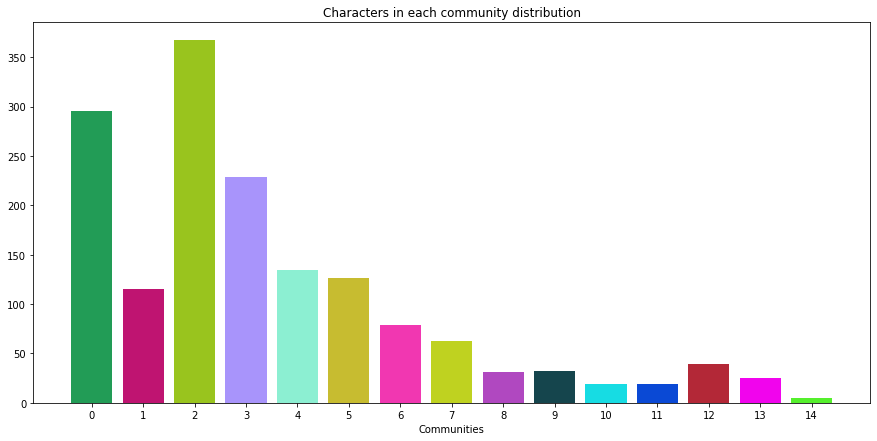

In [844]:
from collections import Counter

fig = plt.figure(figsize=(15,7))
plt.bar(range(no_communities),val , color = colors)
plt.xticks(range(no_communities),range(no_communities))
plt.xlabel("Communities")
plt.title('Characters in each community distribution')
plt.show()
fig.savefig("commmunity distribution", format='png')

In [860]:
# copy of graph
community_graph_movies_tv = U_GCC_with_movies_tv.copy()

partition_movie_tv = community_louvain.best_partition(community_graph_movies_tv)

# creaate color dependent on community
no_communities = len(set(partition_movie_tv.values()))
colors = get_community_colors(no_communities)

com = np.arange(0,no_communities)
clr = {com[i]: colors[i] for i in range(no_communities)}
color_com = {}

for keys,values in partition_movie_tv.items():
    color_com[keys] = {'color': clr[values]}



In [535]:
# Add attributes to the graph
titles = {}
for name, data in U_GCC.nodes(data = True):
    title = 'name: '+ name +'</br>movies: ' + str(data['movies']) +'</br>tv-serie: ' + \
                    str(data['tv-serie'])+'</br>Teams: ' + str(data['Team(s)']) \
                    +'</br>Organisation: ' + str(data['Organisation(s)']) + ' </br>citizen: ' \
                    + str(data['citizen']) + ' </br>specie: ' + str(data['specie']) + ' </br>status: ' \
                    + str(data['status'])
    titles[name] = title

# nx.set_node_attributes(D_GCC, att) # Hvis number of movies skal være node size (men så overser vi dem i tv -serier)

In [536]:
# update attributes
nx.set_node_attributes(U_GCC, titles, 'title')
degrees = dict(community_graph_movies_tv.degree)
degrees.update((key,value) for key, value in degrees.items())
nx.set_node_attributes(community_graph_movies_tv,degrees,'size')
nx.set_node_attributes(community_graph_movies_tv,color_com)



In [537]:
# Create graph with all characters and movies as nodes!
pyvis_graph(community_graph_movies_tv, 'Community Detection of Character graph', 
            'community_detection_character_show_graph.html',gravity = -30,damping=1)